In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')

In [4]:
day_total = tips.groupby('day', as_index=False)['total_bill'].sum()
day_total

,day,total_bill
0,Thur,1096.33
1,Fri,325.88
2,Sat,1778.40
3,Sun,1627.16


In [8]:
type(day_total)

pandas.core.frame.DataFrame

Text(0, 0.5, 'Total Bill')

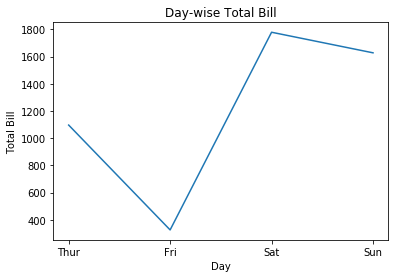

In [11]:
plt.plot(day_total['day'], day_total['total_bill'])
plt.title("Day-wise Total Bill")
plt.xlabel("Day")
plt.ylabel("Total Bill")

Text(0, 0.5, 'Total Bill')

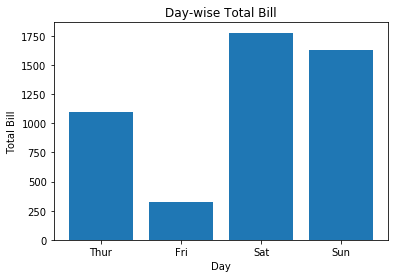

In [14]:
plt.bar(day_total['day'], day_total['total_bill'])
plt.title("Day-wise Total Bill")
plt.xlabel("Day")
plt.ylabel("Total Bill")

Text(0.5, 1.0, 'Day-wise Total Bill')

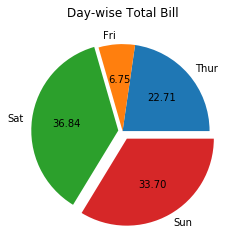

In [22]:
plt.pie(day_total['total_bill'], labels = day_total['day'], autopct ="%.2f", explode = (0,0,.05,0.1))
plt.title("Day-wise Total Bill")

(0, 15)

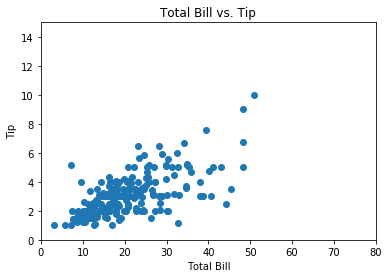

In [26]:
plt.scatter( tips['total_bill'], tips['tip'])
plt.title("Total Bill vs. Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.xlim((0,80))
plt.ylim((0,15))

## Object API

Text(0, 0.5, 'Total Bill')

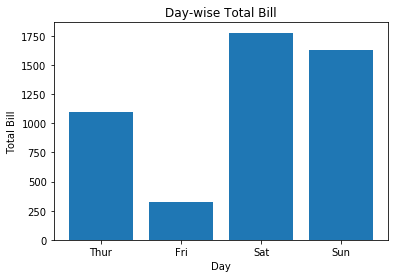

In [30]:
ax = plt.subplot()
ax.bar(day_total['day'], day_total['total_bill'])
ax.set_title("Day-wise Total Bill")
ax.set_xlabel("Day")
ax.set_ylabel("Total Bill")

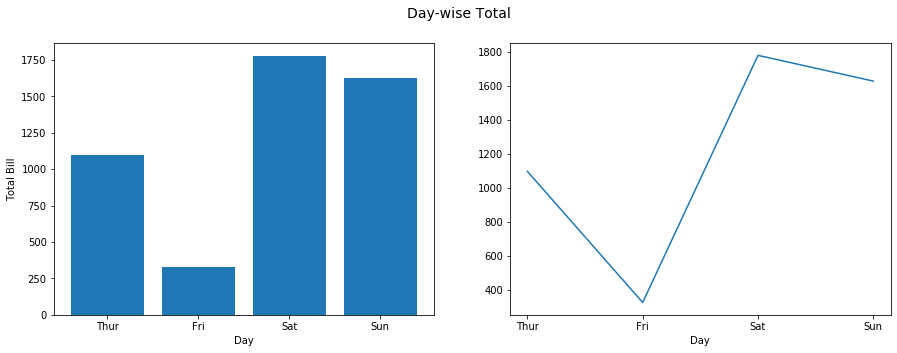

In [7]:
fig,ax = plt.subplots(1,2)
fig.suptitle('Day-wise Total', fontsize=14)
fig.set_size_inches(15,5)
ax[0].bar(day_total['day'], day_total['total_bill'])
# ax[0].set_title("Day-wise Total Bill")
ax[0].set_xlabel("Day")
ax[0].set_ylabel("Total Bill")

ax[1].plot(day_total['day'], day_total['total_bill'])
# ax[1].set_title("Day-wise Total Bill")
ax[1].set_xlabel("Day")
fig.savefig("day_total.jpg")

### Histogram

(array([29., 57., 34., 47., 24., 22., 18.,  3.,  3.,  4.,  1.,  0.,  0.,
         1.,  1.]),
 array([ 1. ,  1.6,  2.2,  2.8,  3.4,  4. ,  4.6,  5.2,  5.8,  6.4,  7. ,
         7.6,  8.2,  8.8,  9.4, 10. ]),
 <a list of 15 Patch objects>)

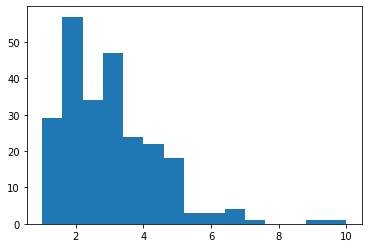

In [10]:
plt.hist(tips['tip'], bins=15)

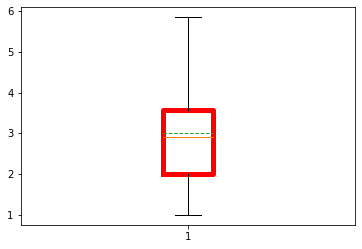

In [40]:
prop = { 'color':'red', 'linewidth' : 5}
ax = plt.boxplot(tips['tip'], showfliers=False, showmeans=True, meanline=True, boxprops=prop)

In [15]:
ax

{'whiskers': [<matplotlib.lines.Line2D at 0x29bdf153788>,
 'caps': [<matplotlib.lines.Line2D at 0x29bdf161188>,
 'boxes': [<matplotlib.lines.Line2D at 0x29bdf161d88>],
 'medians': [<matplotlib.lines.Line2D at 0x29bdf16c708>],
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x29bdf1673c8>]}

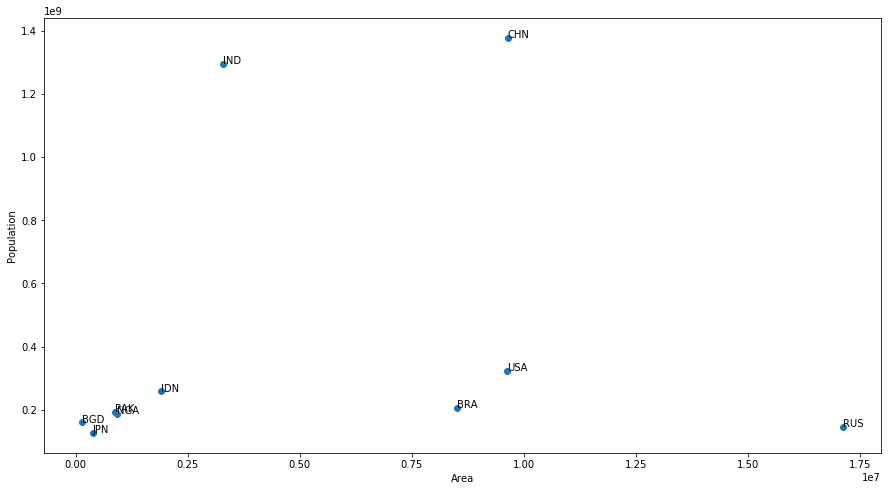

In [18]:
countries = pd.read_json("https://restcountries.eu/rest/v2/all")
# Take only top 10 countries by population
tc = countries.sort_values (by='population', ascending=False).head(10)[['population','area','alpha3Code']]
plt.scatter(x = tc ['area'], y = tc ['population'])
plt.gcf().set_size_inches (15,8) # gcf () get current figure and change its size     
plt.xlabel("Area")
plt.ylabel("Population")
# set labels for dots
for i in tc.index:
    plt.annotate(tc.loc[i,'alpha3Code'],xy=(tc.loc[i,'area'],tc.loc[i,'population']))


In [19]:
smoker_total  = pd.crosstab(tips['day'], tips['smoker'], tips['total_bill'], aggfunc=sum)

In [20]:
smoker_total

smoker,Yes,No
day,,
Thur,326.24,770.09
Fri,252.20,73.68
Sat,893.62,884.78
Sun,458.28,1168.88


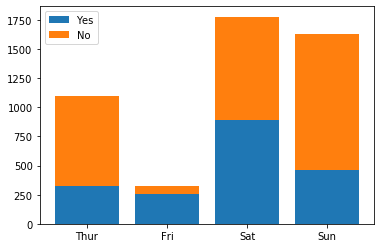

In [22]:
ax = plt.subplot()
ax.bar(smoker_total.index , height=smoker_total['Yes'])
ax.bar(smoker_total.index , height=smoker_total['No'],bottom = smoker_total["Yes"])
ax.legend(smoker_total.columns)

Text(0.5, 1.0, 'Total Bill Per Day for Smokers and Non-Smokers')

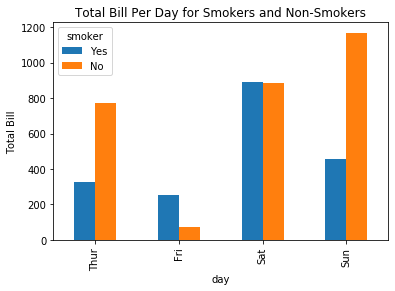

In [28]:
ax = smoker_total.plot(kind='bar')
ax.set_ylabel('Total Bill')
ax.set_title('Total Bill Per Day for Smokers and Non-Smokers')

In [29]:
totals  = pd.crosstab(tips['sex'], tips['day'], tips['total_bill'], aggfunc=sum)

In [30]:
totals

day,Thur,Fri,Sat,Sun
sex,,,,
Male,561.44,198.57,1227.35,1269.46
Female,534.89,127.31,551.05,357.70


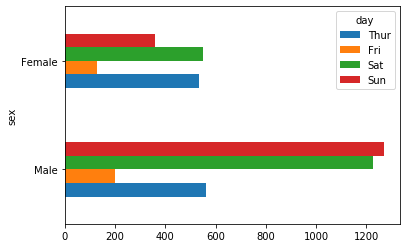

In [32]:
totals.plot(kind='barh')

In [36]:
male = tips.loc[ tips['sex'] == 'Male'].groupby('day')['total_bill'].sum()
female  = tips.loc[ tips['sex'] == 'Female'].groupby('day')['total_bill'].sum()

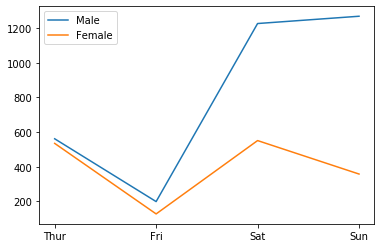

In [39]:
plt.plot(male)
plt.plot(female)
plt.legend(['Male','Female'])